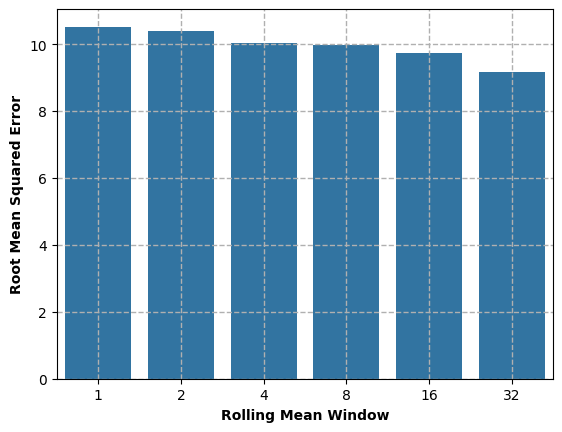

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

# Load the data
df = pd.read_csv('smoothing.csv')

g = sns.barplot(data=df, x='y_smoothing', y='root_mean_squared_error')
plt.ylabel('Root Mean Squared Error', fontweight='bold')
plt.xlabel('Rolling Mean Window', fontweight='bold')
g.grid(True, which='both', linestyle='--', linewidth=1)

plt.savefig('smoothing.pdf', bbox_inches='tight', pad_inches=0.2, format='pdf')
plt.show()